In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import glob
import pandas as pd
from scripts.data_readers import read_gauge, get_params
from pathlib import Path
from hydro_models import hbv, gr4j_cema_neige

calibration_place = Path('./cal_res')
hbv_calibration = Path(f'{calibration_place}/hbv_full')
hbv_calibration.mkdir(exist_ok=True, parents=True)
gr4j_calibration = Path(f'{calibration_place}/hbv_full')
gr4j_calibration.mkdir(exist_ok=True, parents=True)


ready_hbv = [i.split('/')[-1][:-4]
             for i in glob.glob('./cal_res/hbv_full/*.csv')]
ready_gr4j = [i.split('/')[-1][:-4]
              for i in glob.glob('./cal_res/gr4j_full/*')]
hbv_df = pd.DataFrame()
gr4j_df = pd.DataFrame()

In [2]:
train, test = read_gauge(gauge_id='12554',
                         simple=False)

In [1]:
import glob
import pandas as pd
from scripts.data_readers import read_gauge, get_params
from pathlib import Path

calibration_place = Path('./cal_res')
hbv_calibration = Path(f'{calibration_place}/hbv_full')
hbv_calibration.mkdir(exist_ok=True, parents=True)

ready_hbv = [i.split('/')[-1][:-4]
             for i in glob.glob('./cal_res/hbv_full/*.csv')]

gr4j_df = pd.DataFrame()

for i, gauge in enumerate([i.split('/')[-1][:-3]
                           for i in
                           glob.glob('../geo_data/great_db/nc_all_q/*.nc')]):
    


In [4]:
from typing import Optional
import numpy as np


def result_calibrator(calibration_folder: str,
                      meteo_folder: list,
                      model_name: str):

    res_df = pd.DataFrame()
    for i, gauge in enumerate([i.split('/')[-1][:-3]
                               for i in
                               meteo_folder]):
        train, test = read_gauge(gauge_id=gauge, simple=False)
        res_df.loc[i, 'gauge_id'] = gauge

        try:
            nse_val, _ = get_params(gauge_id=gauge,
                                    iter_number=0,
                                    model_name=model_name,
                                    params_path=Path(f'{calibration_folder}'),
                                    train=train, test=test,
                                    calibrate=False,
                                    with_plot=False)
            res_df.loc[i, f'nse_{model_name}'] = nse_val
        except FileNotFoundError:
            res_df.loc[i, f'nse_{model_name}'] = np.NaN

    return res_df

In [5]:
test_df_gr4j = result_calibrator(calibration_folder='./cal_res/gr4j_full/',
                                 meteo_folder=glob.glob(
                                     '../geo_data/great_db/nc_all_q/*.nc'),
                                 model_name='gr4j')

In [7]:
test_df.dropna().median()

gauge_id    19122.50000
nse_gr4j        0.45773
dtype: float64

In [8]:
test_df_hbv = result_calibrator(calibration_folder='./cal_res/hbv_full/',
                                meteo_folder=glob.glob(
                                    '../geo_data/great_db/nc_all_q/*.nc'),
                                model_name='hbv')

,gauge_id,nse_gr4j
0,12554,0.386866
1,5746,0.725668
2,8376,-6.364886
3,3159,0.623936
4,74438,-0.114834
...,...,...
1109,9079,-0.169758
1110,72519,0.548018
1111,70827,0.709750
1112,4107,0.163530


In [22]:
test_df_hbv.set_index('gauge_id').join(test_df.set_index('gauge_id')).median()

nse_hbv     0.268075
nse_gr4j    0.457730
dtype: float64

In [30]:
res_df = pd.DataFrame()
for i, gauge in enumerate([i.split('/')[-1][:-3]
                            for i in
                            glob.glob('../geo_data/great_db/nc_all_q/*.nc')]):
    train, test = read_gauge(gauge_id=gauge, simple=False)

    nse_val, _ = get_params(gauge_id=gauge,
                            iter_number=0,
                            model_name='gr4j',
                            params_path=Path('./cal_res/gr4j_full/'),
                            train=train, test=test,
                            calibrate=False,
                            with_plot=False)
    res_df.loc[i, 'gauge_id'] = gauge
    res_df.loc[i, f'nse_gr4j'] = nse_val

SyntaxError: '[' was never closed (<string>, line 1)

In [32]:
folder = Path('./cal_res/gr4j_full/')
lines = open(f'{folder}/{gauge}', 'r').read().splitlines()

edited_line = lines[3].split(':')[1] + ']'
params = eval(edited_line)[0]
        
        
# params = eval(lines[3].split(':')[1])[0]

In [34]:
params

(62.119675, -1.1597477, 103.14968, 5.4663434, 0.7635524, 4.708287, 2.4600852)

In [33]:
lines

['gr4j: ',
 '',
 'RMSE: 0.7856725',
 'params: [(62.119675, -1.1597477, 103.14968 , 5.4663434, 0.7635524 , 4.708287 , 2.4600852)',
 ' (62.102016, -1.1589255, 103.18681 , 5.4668927, 0.7636597 , 4.709492 , 2.4597344)',
 ' (62.09919 , -1.1585698, 103.20115 , 5.466416 , 0.7637372 , 4.7094984, 2.4595454)',
 ' (62.08009 , -1.160021 , 103.180954, 5.4663973, 0.76354766, 4.7082596, 2.4600174)',
 ' (62.089455, -1.1594112, 103.16455 , 5.4663553, 0.7637673 , 4.707796 , 2.4598334)',
 ' (62.12278 , -1.1593876, 103.13172 , 5.466452 , 0.763384  , 4.7079687, 2.4604177)]',
 '',
 '-------------------------',
 '']

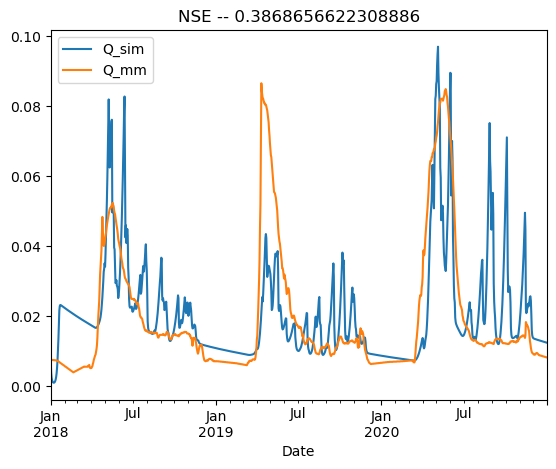

0.3868656622308886

In [7]:
get_params(
    gauge_id='12554',
    model_name='gr4j',
    iter_number=6,
    params_path=Path('./cal_res/gr4j_full/'),
    train=train, test=test,
    calibrate=False,
    with_plot=True)[0]